# Voxel plotting for 3D array data


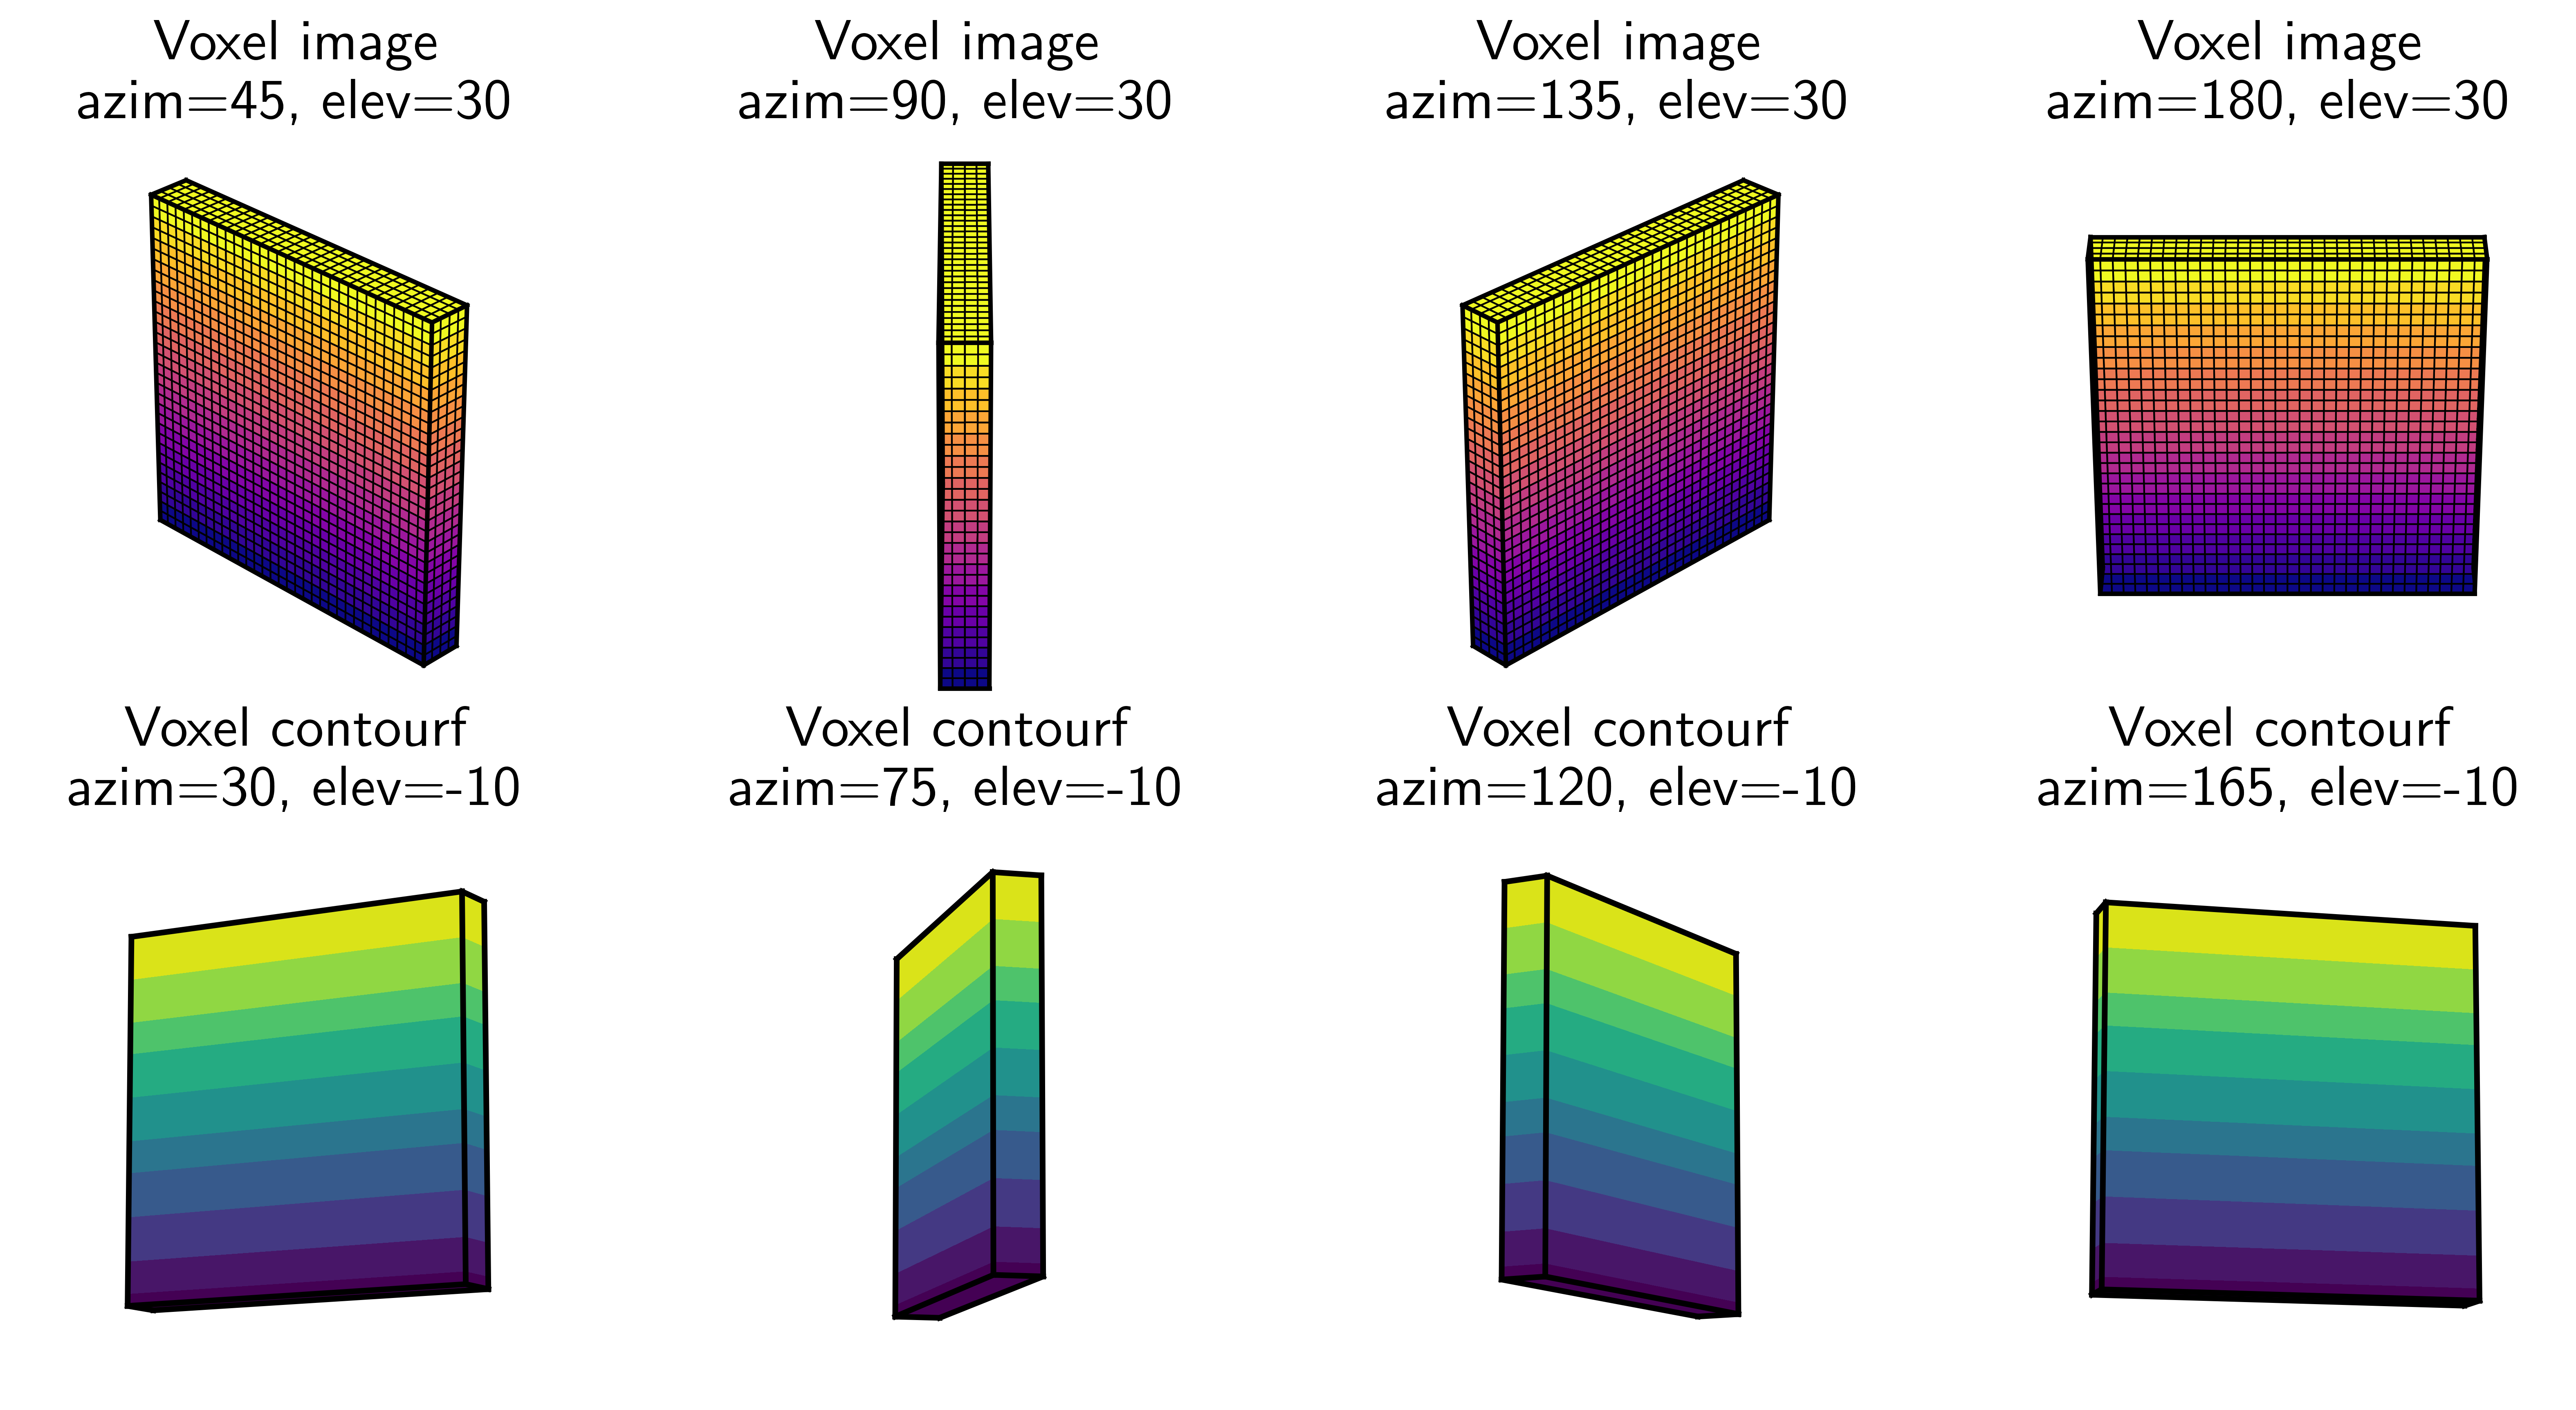

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cm_vis.grid import load_vox, voxel_image, voxel_contourf

# load data
vox_path = "./sample_data/Macrostructure_1.vox"
vox = load_vox(vox_path)  # convert to numpy array
vox = vox.swapaxes(0, 1)

# plot using voxel_image
plt.style.use("sans")
fig, axes = plt.subplots(2, 4, subplot_kw={"projection": "3d"}, figsize=(8, 4))

# (azim, elev)
views = [
    (45, 30),
    (90, 30),
    (135, 30),
    (180, 30),
    (30, -10),
    (75, -10),
    (120, -10),
    (165, -10),
]

for i, (azim, elev) in enumerate(views[:4]):
    ax = axes[0, i]
    ax.view_init(elev=elev, azim=azim, vertical_axis="y")
    ax.set_box_aspect([1 / 8, 1, 1])
    voxel_image(vox, cmap="plasma", edge=True, surf_kw={"edgecolor": "k", "linewidth": 0.3}, ax=ax)
    ax.set_title(f"Voxel image\nazim={azim}, elev={elev}", fontsize=10)
    ax.set_axis_off()

for i, (azim, elev) in enumerate(views[4:]):
    ax = axes[1, i]
    ax.view_init(elev=elev, azim=azim, vertical_axis="y")
    ax.set_box_aspect([1 / 8, 1, 1])
    voxel_contourf(vox, cmap="viridis", edge=True, edge_kw={"color": "k", "linewidth": 1}, ax=ax)
    ax.set_title(f"Voxel contourf\nazim={azim}, elev={elev}", fontsize=10)
    ax.set_axis_off()

(175, 32, 32)
(175, 32, 32, 4)


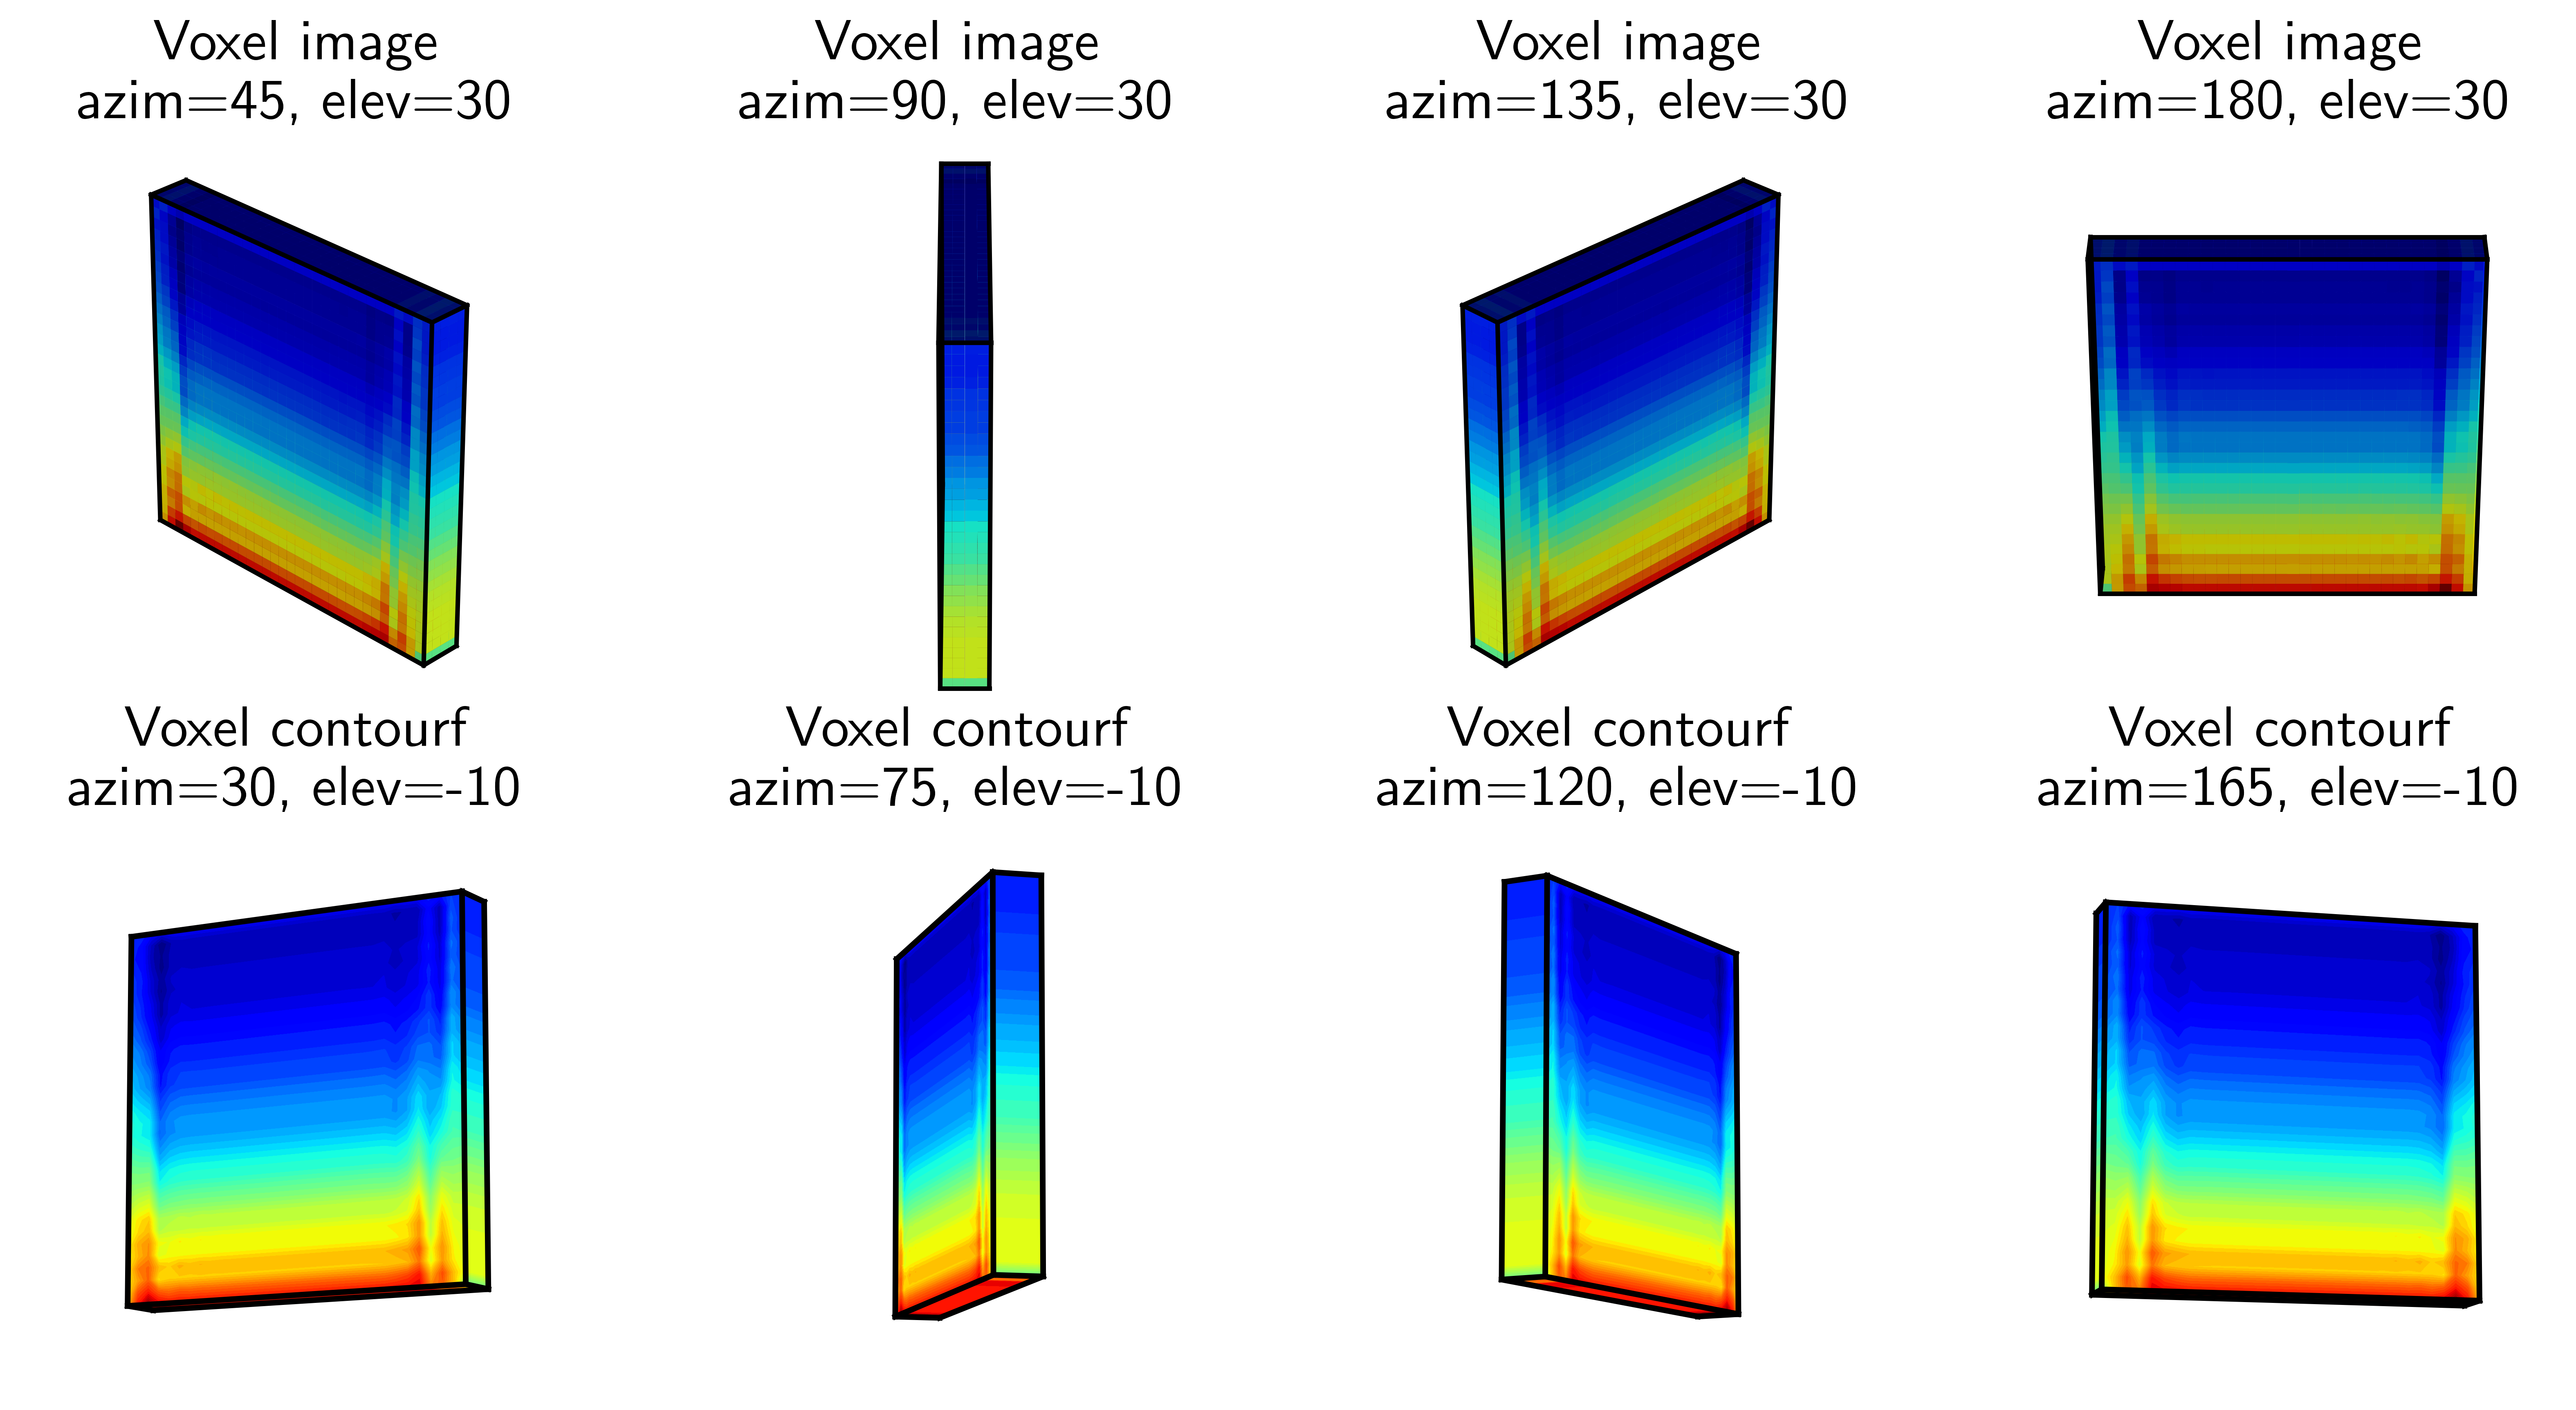

In [2]:
# plot directly from numpy array
import numpy as np
import matplotlib.pyplot as plt
from cm_vis.grid import voxel_image

data = np.load("./sample_data/electric.npy")
print(data.shape)  # t, x, y

# repeat in z dir for 4 times
data = np.repeat(data[:, :, :, np.newaxis], 4, axis=3)
print(data.shape)  # t, x, y, z
vox = data[-1, :, :, :]  # get the last time step

# plot using voxel_image
plt.style.use("sans")
fig, axes = plt.subplots(2, 4, subplot_kw={"projection": "3d"}, figsize=(8, 4))

# (azim, elev)
views = [
    (45, 30),
    (90, 30),
    (135, 30),
    (180, 30),
    (30, -10),
    (75, -10),
    (120, -10),
    (165, -10),
]

for i, (azim, elev) in enumerate(views[:4]):
    ax = axes[0, i]
    ax.view_init(elev=elev, azim=azim, vertical_axis="y")
    ax.set_box_aspect([1 / 8, 1, 1])
    voxel_image(vox, cmap="jet", edge=True, shade=True, surf_kw={"edgecolor": "none"}, ax=ax)
    ax.set_title(f"Voxel image\nazim={azim}, elev={elev}", fontsize=10)
    ax.set_axis_off()

for i, (azim, elev) in enumerate(views[4:]):
    ax = axes[1, i]
    ax.view_init(elev=elev, azim=azim, vertical_axis="y")
    ax.set_box_aspect([1 / 8, 1, 1])
    voxel_contourf(vox, cmap="jet", edge=True, level=50, edge_kw={"color": "k", "linewidth": 1}, ax=ax)
    ax.set_title(f"Voxel contourf\nazim={azim}, elev={elev}", fontsize=10)
    ax.set_axis_off()